# Setup

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data

# XRD

In [3]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [4]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [5]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
XRD_data = {}

# ETB-046 Variables
samples_dir = {
    "etb069": "200123 ETB-069 MAPbI on glass FF DMF/",
#     "etb050": "191029 ETB-050 MAPbBr on glass FF/",
#     "etb051": "191030 ETB-051 MAPbBr on glass FF/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])


Creating new local data folder.


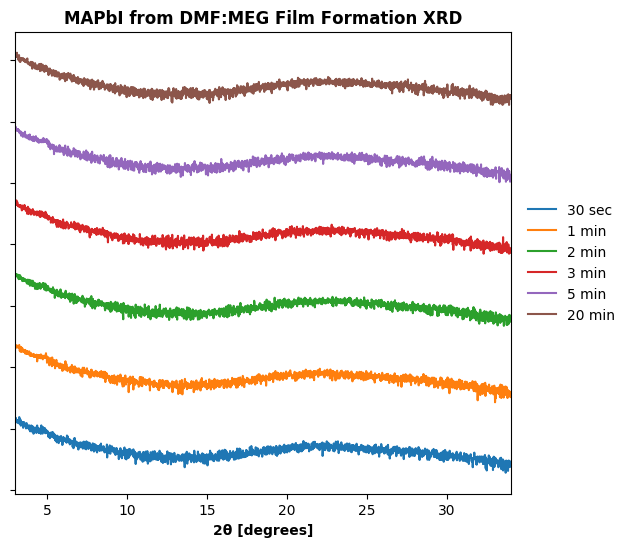

In [12]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
            
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            
plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
# plt.ylabel("Counts", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(XRD_data["etb069"]["1min"]["2theta"]), max(XRD_data["etb069"]["1min"]["2theta"]))

plt.title("MAPbI from DMF:MEG Film Formation XRD",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [13]:
fig.savefig("plots/200123/XRD/all_stacked_log.png", dpi=200, format='png', bbox_inches='tight')